<a href="https://colab.research.google.com/github/RussianPlay/sql-project/blob/main/sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

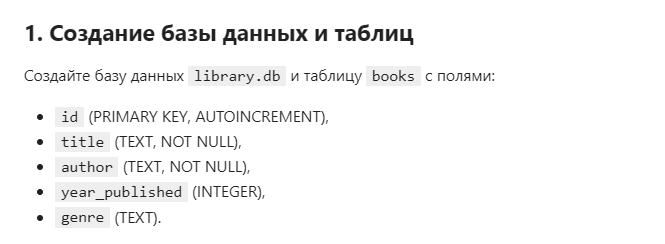

In [13]:
import sqlite3
from datetime import datetime
import os

db_file = "data.db"
con = sqlite3.connect(db_file)
cur = con.cursor()

cur.execute("""DROP TABLE IF EXISTS books""")

# 1
cur.execute("""
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER,
    genre TEXT
);
""")
con.commit()

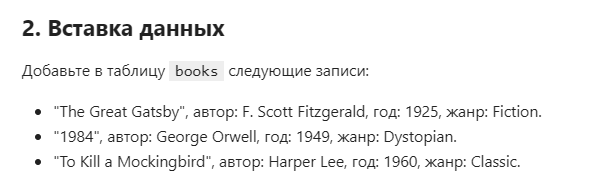

In [14]:
# 2
lst = [["The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction."],
       ["1984", "George Orwell", 1949, "Dystopian."],
       ["To Kill a Mockingbird", "Harper Lee", 1960, "Classic."]]

for el in lst:
    cur.execute("""
    INSERT INTO books (title, author, year_published, genre)
    VALUES (?, ?, ?, ?);""", el)
con.commit()

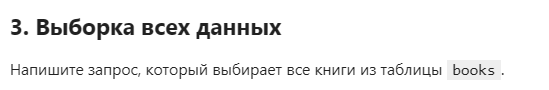

In [15]:
# 3
books = cur.execute("SELECT * FROM books").fetchall()
print(books)

[(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction.'), (2, '1984', 'George Orwell', 1949, 'Dystopian.'), (3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic.')]


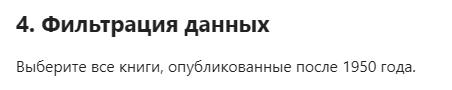

In [16]:
# 4
books = cur.execute("SELECT * FROM books WHERE year_published > 1950;").fetchall()
print(books)

[(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic.')]


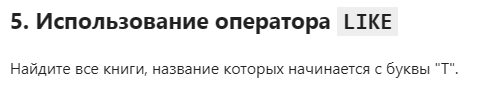

In [17]:
# 5
books = cur.execute("SELECT * FROM books WHERE title LIKE 'T%';").fetchall()
print(books)

[(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction.'), (3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic.')]


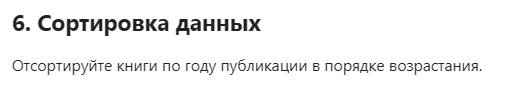

In [18]:
# 6
books = cur.execute("SELECT * FROM books ORDER BY year_published;").fetchall()
print(books)

[(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction.'), (2, '1984', 'George Orwell', 1949, 'Dystopian.'), (3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic.')]


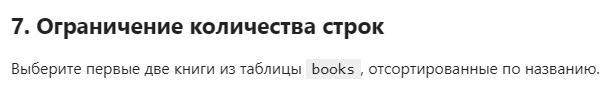

In [19]:
# 7
k = cur.execute("SELECT * FROM books ORDER BY title LIMIT 2;").fetchall()
print(k)

[(2, '1984', 'George Orwell', 1949, 'Dystopian.'), (1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction.')]


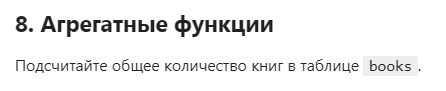

In [20]:
# 8
k = cur.execute("SELECT COUNT(*) FROM books;").fetchone()[0]
print(k)

3


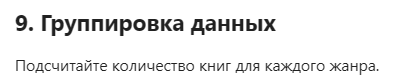

In [21]:
# 9
k = cur.execute("SELECT genre, COUNT(*) as count FROM books GROUP BY genre;").fetchall()
print(k)

[('Classic.', 1), ('Dystopian.', 1), ('Fiction.', 1)]


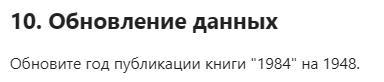

In [22]:
# 10
cur.execute("""
UPDATE books
SET year_published = 1948
WHERE title = '1984';""")
con.commit()


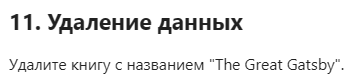

In [23]:
# 11
cur.execute("""DELETE FROM books WHERE title='The Great Gatsby';""")
con.commit()

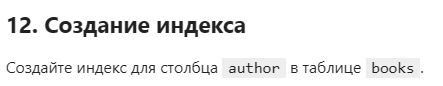

In [24]:
# 12
cur.execute("""CREATE INDEX IF NOT EXISTS idx_author ON books (author);""")
con.commit()

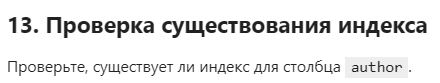

In [25]:
# 13
cur.execute("""SELECT name FROM sqlite_master WHERE type='index' AND name='idx_author';""")
result = cur.fetchone()
if result:
    print(f"Индекс {result[0]} Существует")
else:
    print(f"Индекс не существует")

Индекс idx_author Существует


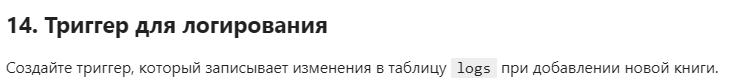

In [26]:
# 14
cur.execute("""
CREATE TABLE IF NOT EXISTS logs (
    book_id INTEGER,
    action TEXT
);
""")

cur.execute("""
CREATE TRIGGER IF NOT EXISTS log_book_changes
AFTER INSERT ON books
FOR EACH ROW
BEGIN
    INSERT INTO logs (book_id, action)
    VALUES (NEW.id, "INSERT");
END;
""")
con.commit()

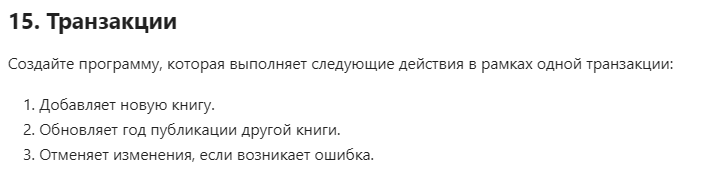

In [27]:
# 15
book = ["Elmir book", "Elmir", 2025, "Classic."]
try:
    cur.execute("BEGIN TRANSACTION")

    cur.execute("""
    INSERT INTO books (title, author, year_published, genre)
    VALUES (?, ?, ?, ?);
    """, book)

    cur.execute("""
    UPDATE books
    SET year_published = 2025
    WHERE title='To Kill a Mockingbird';
    """)
    con.commit()
except Exception as e:
    con.rollback()
    print(f"Ошибка {e}")

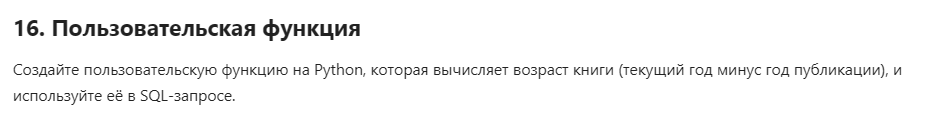

In [28]:
# 16
def get_cur_age(db_cur, book_name):
    year = db_cur.execute("""SELECT year_published FROM books WHERE title=?;""", (book_name,)).fetchone()[0]
    cur_year = datetime.now().year
    return cur_year - year


print(get_cur_age(cur, "1984"))

77


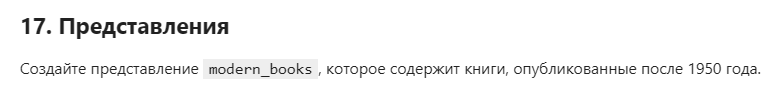

In [29]:
# 17
cur.execute("""
CREATE VIEW IF NOT EXISTS after_1950_year AS
SELECT * FROM books WHERE year_published > 1950;
""")
con.commit()

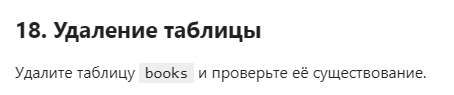

In [32]:
# 18
cur.execute("""DROP TABLE IF EXISTS books""")
con.commit()

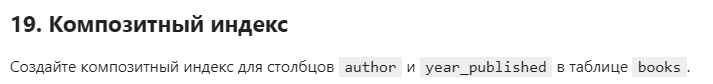

In [31]:
# 19
cur.execute("""
CREATE INDEX IF NOT EXISTS idx_books_author_year
ON books (author, year_published);
""")
con.commit()
con.close()

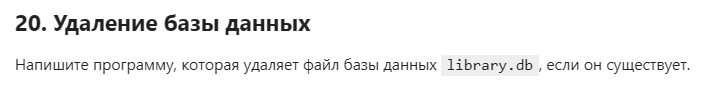

In [33]:
# 20
if os.path.exists(db_file):
    print(f"Удаляем базу данных '{db_file}'")
    os.remove(db_file)
else:
    print(f"База данных '{db_file}' не существует")

Удаляем базу данных 'data.db'
